<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Exercices/7-1_solution_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 7: Les statistiques et la science des données appliquées
##Exercice 1
###Solutionnaire

Effectuez une régression simple en testant l'hypothèse que la taille du réseau professionnel est associée au statut socioéconomique.

*Ne vous préoccupez pas des données extrêmes pour l'instant.

In [ ]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Loading required package: rsq



In [ ]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Exercices/7-1-2_donnees.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd"
bd #Lecture des données

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  id = col_double(),
  ses = col_double(),
  genre = col_double(),
  reseau = col_double(),
  scolarite = col_double(),
  experience = col_double()
)




X1,id,ses,genre,reseau,scolarite,experience
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,62.50000,2,24,2,6
2,5,17.10000,2,10,0,1
3,6,69.20000,2,13,3,12
4,7,29.80000,1,4,0,4
5,8,37.70000,2,24,1,4
6,9,37.70000,2,6,1,6
7,10,47.85451,2,14,2,9
8,11,92.30000,2,9,4,27
9,12,80.90000,2,5,4,14


In [ ]:
#Statistiques descriptives

summary(bd$ses)
summary(bd$experience)

sd(bd$ses)
sd(bd$experience)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.10   32.40   40.20   47.85   63.50   97.20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00    7.00    9.64   14.00   41.00 

[1] 18.58611

[1] 7.367546

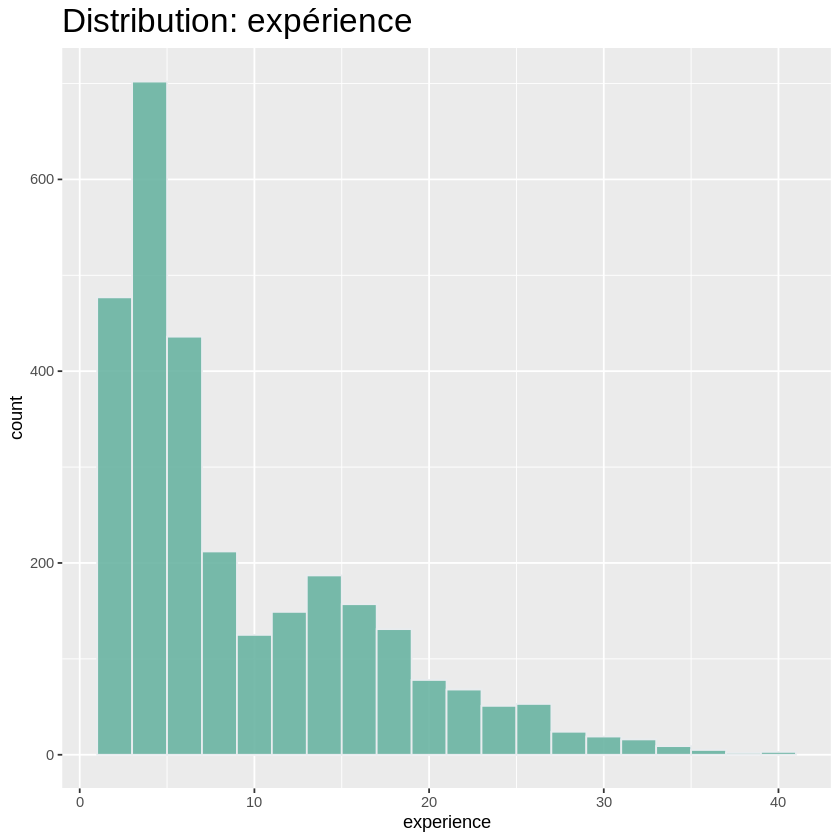

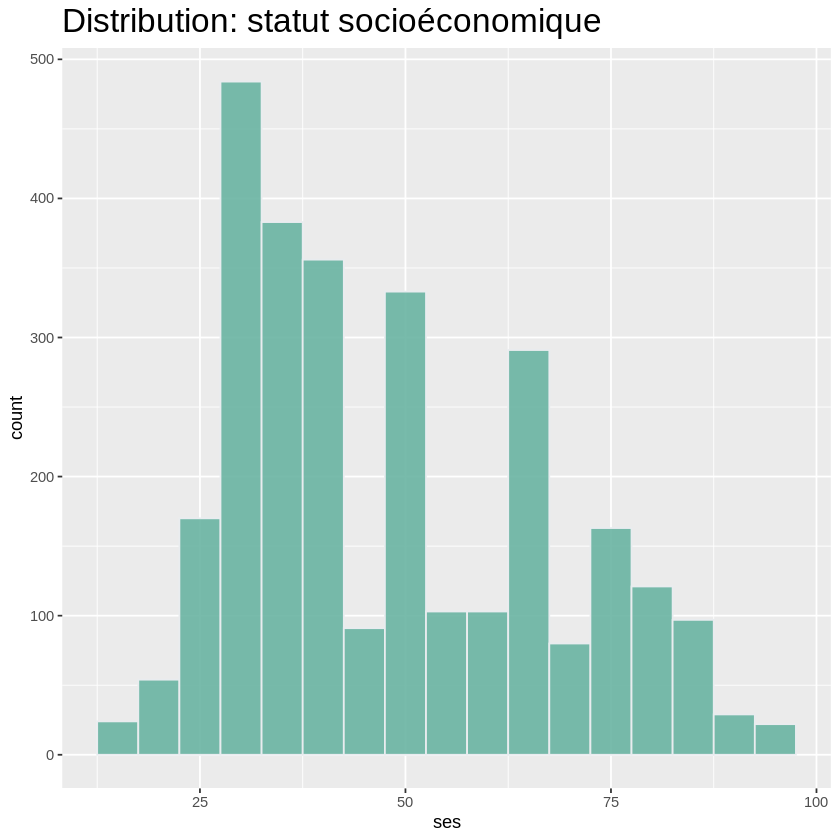

In [ ]:
#Histogramme pour vérification du postulat de normalité

ggplot(bd, aes(x=experience)) +
  geom_histogram(binwidth=2, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: expérience") +
    theme(
      plot.title = element_text(size=20)
    )

ggplot(bd, aes(x=ses)) +
  geom_histogram(binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: statut socioéconomique") +
    theme(
      plot.title = element_text(size=20)
    )

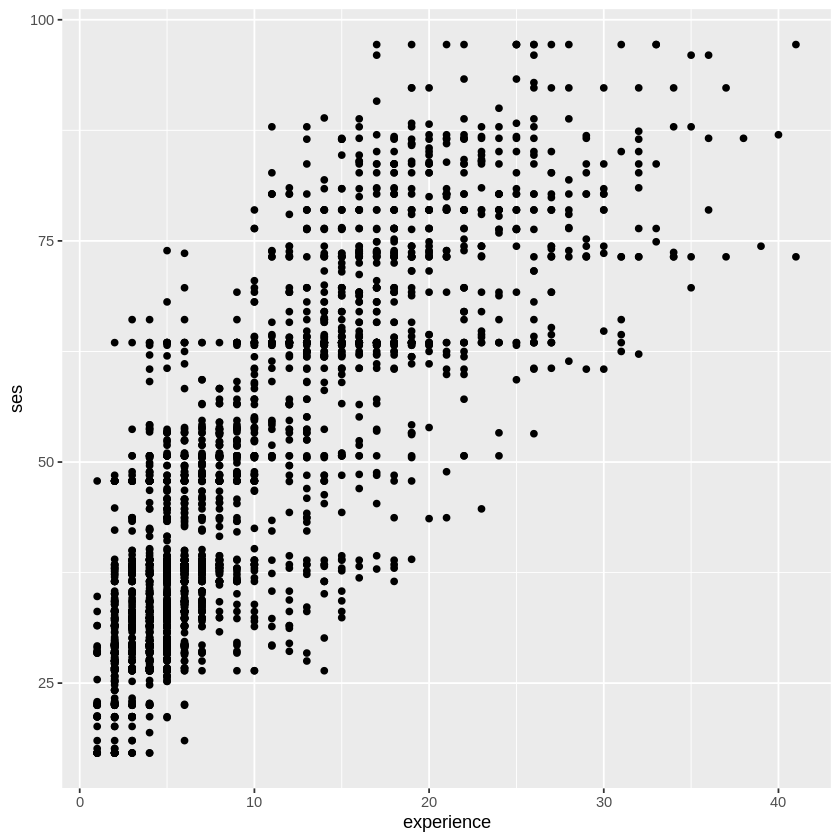

In [ ]:
#Nuage de points
ggplot(bd, aes(x=experience, y=ses)) + 
    geom_point()

In [ ]:
#Faire la régression linéaire

reglineaire <- glm(experience ~ ses, data = bd, family="gaussian")
summary(rstandard(reglineaire))
summary(reglineaire)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.234562 -0.536311 -0.087648  0.000027  0.363790  5.625305 


Call:
glm(formula = experience ~ ses, family = "gaussian", data = bd)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.2270   -2.1936   -0.3585    1.4880   23.0038  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.136823   0.209738  -29.26   <2e-16 ***
ses          0.329686   0.004086   80.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 16.73919)

    Null deviance: 157577  on 2903  degrees of freedom
Residual deviance:  48577  on 2902  degrees of freedom
AIC: 16428

Number of Fisher Scoring iterations: 2


In [ ]:
#Calcul du r-carré

rsq(reglineaire)

[1] 0.6917243